In [1]:
import minimalmodbus as bus

In [3]:

PORT = 'COM14'

def combine_to_32(high, low):
    combined_data = (high << 16) | low
    return combined_data

driver = bus.Instrument(PORT, 127, mode=bus.MODE_RTU)

driver.serial.baudrate  = 115200
driver.serial.bytesize  = 8
driver.serial.parity    = bus.serial.PARITY_NONE
driver.serial.stopbits  = 2
driver.serial.timeout   = 1

driver.close_port_after_each_call = True
driver.clear_buffers_before_each_transaction = True

# driver.write_register(1294,2,0,16)
pathData = driver.read_registers(int("0x606",16),2,3) # 1542 -->> P6.003
pathDef = driver.read_registers(int("0x604",16),2,3) # 1542 -->> P6.003
# driver.write_register()
#msg = driver.read_registers(1294,2,3) # 1294 -->> P5.007

print('P6.004: ')
for i in pathDef:
    print(hex(i).zfill(4))



print('P6.003: ')
for i in pathData:
    print(hex(i).zfill(4))
print('#############')
print(f"0x{combine_to_32(pathData[1],pathData[0]):08x}")
print(combine_to_32(pathData[1],pathData[0]))
print("-----------")
print("Path data:")
print(f"0x{combine_to_32(pathDef[1],pathDef[0]):08x}")
#print('P5.007: ')
#print(msg)

P6.004: 
0x5552
00x3
P6.003: 
0xbb12
00x3
#############
0x0003bb12
244498
-----------
Path data:
0x00035552


In [7]:
driver.write_register(int("0x050e",16),1)
# set to 1000 to stop PR commands

In [5]:
driver.write_register(int("0x050e",16),1000)
# set to 1000 to stop PR commands

In [123]:
test = driver.read_registers(int("0x0412",16),1,3) # 1542 -->> P6.003
binary_representation = bin(test[0])[2:].zfill(6)

print("DO status:", binary_representation)
# disabled | servo alarm | motor reached pos | homing complete | motor is at zero speed | servo ready
# stopped: 0b011011
# moving: 0b010001

DO status: 010001


In [101]:
bin(0x05)

'0b101'

In [39]:
driver.write_registers(int("0x0604",16),[int("0x0052",16),int("0x001a",16)]) # low

#driver.write_register(int("0x0605",16),int("0x001c",16)) # high

In [28]:
409/10e6


4.09e-08

In [25]:
def config_path_data(length):
    # length: mm with sign
    converted = int(length / (409/10e6))
    print(converted)
    if(converted < -214783648 or converted > 214783648):
        print("WRITE ERROR - Too large input value")
        return False 
    high_word = (converted >> 16) & 0xFFFF

    # Extracting the low word (last 16 bits)
    low_word = converted & 0xFFFF

    print("High word:", hex(high_word))
    print("Low word:", hex(low_word))

    driver.write_registers(int("0x0606",16),[low_word,high_word]) #

In [26]:
config_path_data(500)

12224938
High word: 0xba
Low word: 0x89aa


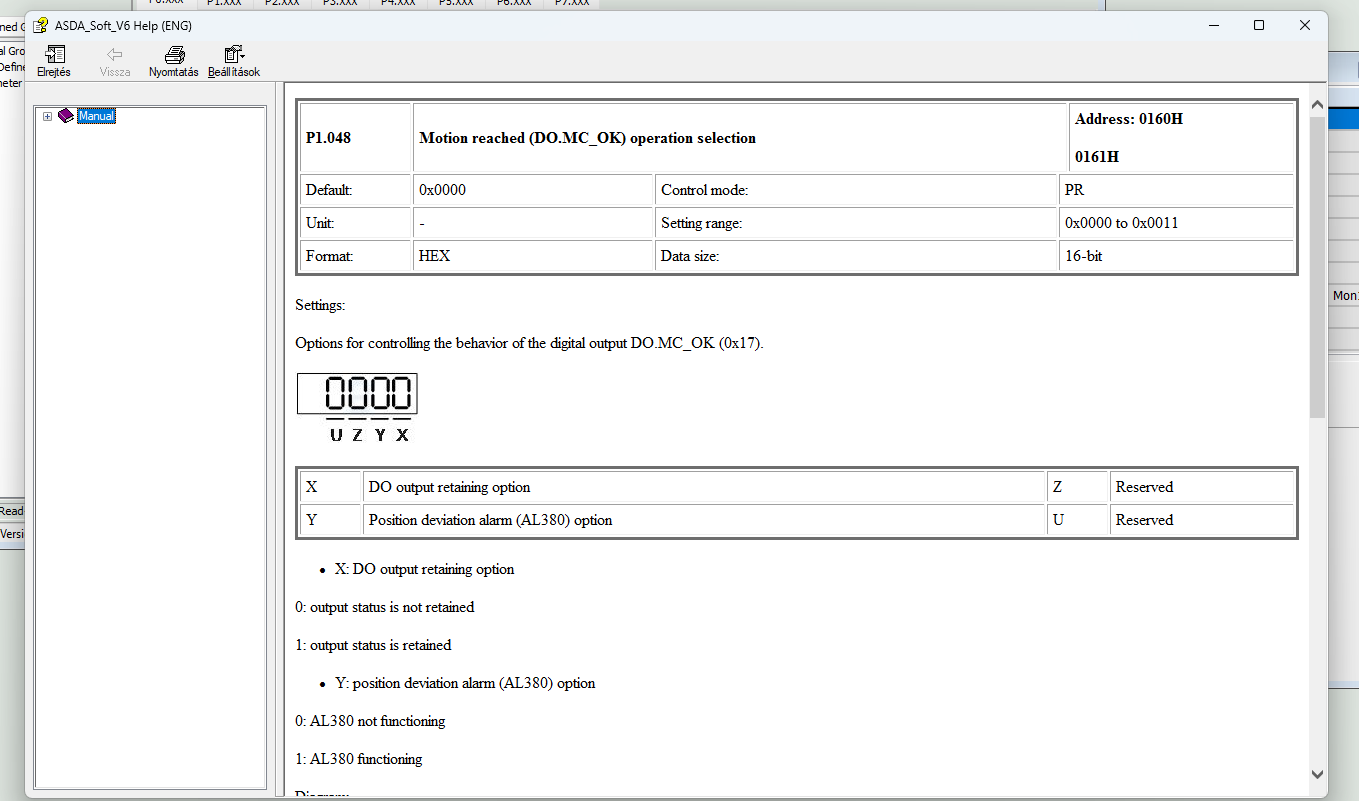

In [2]:
HEXA_MAP = {
    0 : 0,
    1: 1,
    2:2,
    3:3,
    4:4,
    5:5,
    6:6,
    7:7,
    8:8,
    9:9,
    10:'a',
    11:'b',
    12:'c',
    13:'d',
    14:'e',
    15:'f'
}

In [4]:
HEXA_MAP[19]

KeyError: 19